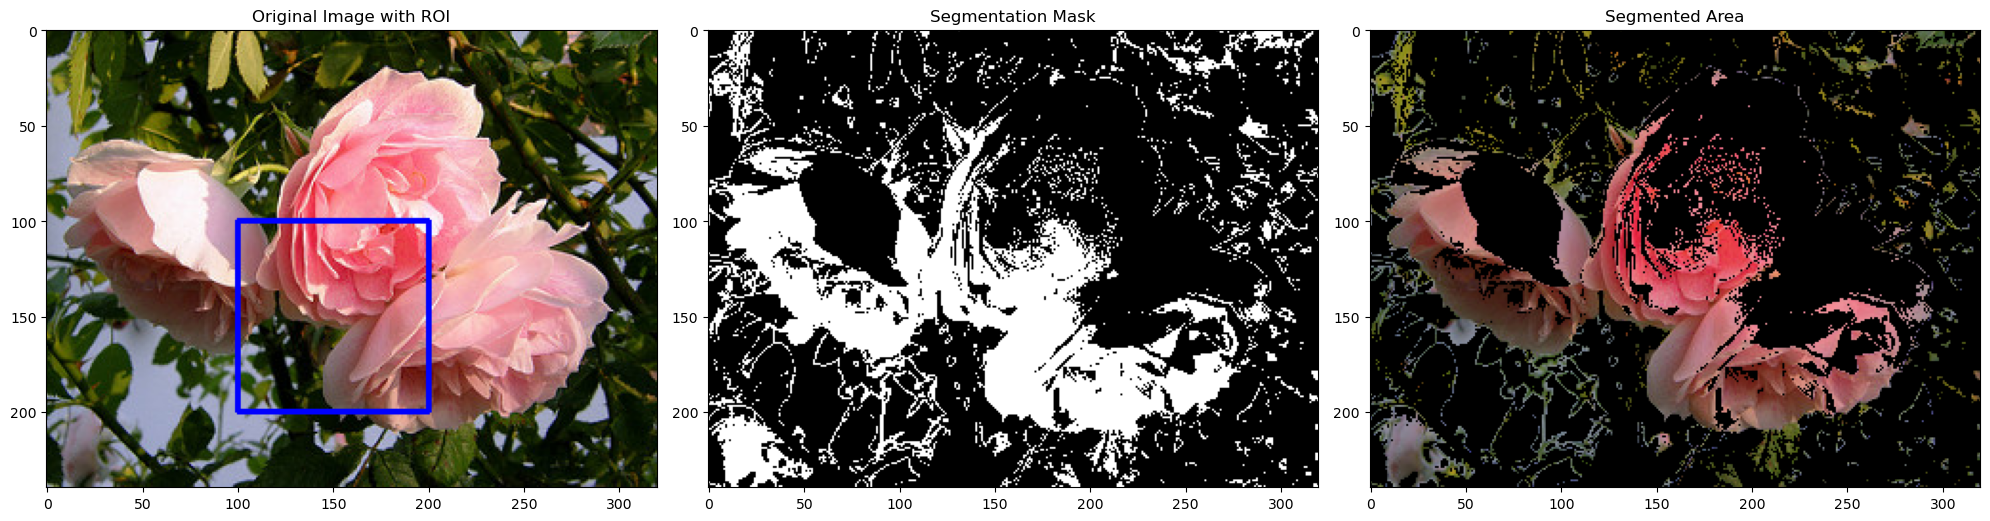

In [16]:
"""
Theoretical Concept:
--------------------
SEGMENTATION IN RGB COLOR SPACE:
Color segmentation in RGB space is a straightforward yet effective approach to classify pixels based on their color similarity to a given reference. Unlike the HSI (Hue, Saturation, Intensity) color space, which separates chromatic content from intensity, RGB segmentation directly uses the red, green, and blue color components, often yielding more precise results due to the use of all three channels.

### Key Components:
1. **Reference Color Vector (a)**:
   A representative "average" color vector is computed based on a sample of colors in the target region of interest.

2. **Similarity Measure**:
   To compare an arbitrary color vector \( z \) with the reference \( a \), the Euclidean distance is commonly used. A pixel is considered part of the target region if its distance from the reference is less than a specified threshold \( D_0 \).

3. **Distance Calculation**:
   The Euclidean distance between two RGB color vectors \( z = [z_R, z_G, z_B] \) and \( a = [a_R, a_G, a_B] \) is given by:
   \[
   D(z, a) = \sqrt{(z_R - a_R)^2 + (z_G - a_G)^2 + (z_B - a_B)^2}
   \]
   Alternatively, for computational efficiency, the squared distance can be used:
   \[
   D^2(z, a) = (z_R - a_R)^2 + (z_G - a_G)^2 + (z_B - a_B)^2
   \]

4. **Thresholding**:
   Pixels with distances less than or equal to \( D_0 \) are classified as part of the segmented region, while others are excluded.

5. **Bounding Box Simplification**:
   - A simpler alternative to the spherical threshold is a bounding box.
   - This box is centered at the reference color \( a \) with dimensions proportional to the standard deviation of the sample colors along each RGB axis.

### Steps for RGB Segmentation:
1. Compute the mean RGB vector \( a \) from the sample region.
2. Compute the standard deviations (\( s_R, s_G, s_B \)) of the red, green, and blue components of the samples.
3. Define a bounding box around \( a \) with dimensions proportional to the standard deviations.
4. For each pixel in the image, check if it falls within the bounding box or satisfies the distance threshold.

### Comparison with HSI:
- HSI focuses on chromatic content but uses fewer variables (e.g., just hue) for segmentation.
- RGB uses three variables (R, G, B), providing a more detailed and accurate segmentation, especially for complex color ranges.

### Example Use Case:
This program segments a reddish region from a given image:
1. A sample region containing reddish colors is selected.
2. The mean vector and standard deviations are computed.
3. A bounding box is defined, and pixels within the box are classified as part of the reddish region.
4. The results are displayed as a binary segmented image.

### Libraries Used:
- **OpenCV**: For image loading, processing, and display.
- **NumPy**: For efficient computation of mean, standard deviation, and distance.

### Output:
The program displays:
1. Original image.
2. Binary segmented image showing the reddish region.

This approach demonstrates how RGB vector segmentation can achieve precise results by leveraging all three color channels for segmentation tasks.
"""

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Define helper functions
def compute_mean_std(image: np.ndarray, roi_coords: tuple) -> tuple:
    """
    Compute mean and standard deviation for the ROI in the RGB image.

    Args:
        image (np.ndarray): Input RGB image.
        roi_coords (tuple): ROI coordinates as (x1, y1, x2, y2).

    Returns:
        tuple: Mean and standard deviation of the ROI (mean_color, std_color).
    """
    x1, y1, x2, y2 = roi_coords
    roi = image[y1:y2, x1:x2]
    mean_color = np.mean(roi, axis=(0, 1))
    std_color = np.std(roi, axis=(0, 1))
    return mean_color, std_color

def segment_by_rgb(image: np.ndarray, mean_color: np.ndarray, std_color: np.ndarray, 
                   threshold_multiplier: float = 1.25) -> np.ndarray:
    """
    Segment the RGB image by bounding box in the RGB space.
    Pixels are classified based on their proximity to the mean color vector.

    Args:
        image (np.ndarray): Input RGB image.
        mean_color (np.ndarray): Mean color vector from ROI.
        std_color (np.ndarray): Standard deviation vector from ROI.
        threshold_multiplier (float): Multiplier for the threshold.

    Returns:
        np.ndarray: Binary mask of the segmented region.
    """
    lower_bound = mean_color - threshold_multiplier * std_color
    upper_bound = mean_color + threshold_multiplier * std_color
    mask = cv2.inRange(image, lower_bound.astype(np.uint8), upper_bound.astype(np.uint8))
    return mask

def visualize_segmentation_results(image: np.ndarray, roi_coords: tuple, mask: np.ndarray) -> None:
    """
    Visualize the original image, ROI, and segmentation mask.

    Args:
        image (np.ndarray): Original RGB image.
        roi_coords (tuple): Coordinates of the ROI (x1, y1, x2, y2).
        mask (np.ndarray): Binary mask of the segmented region.
    """
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    
    # Show original image with ROI
    x1, y1, x2, y2 = roi_coords
    image_with_roi = image.copy()
    cv2.rectangle(image_with_roi, (x1, y1), (x2, y2), (255, 0, 0), 2)
    ax[0].imshow(cv2.cvtColor(image_with_roi, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image with ROI")
    
    # Show segmented mask
    ax[1].imshow(mask, cmap="gray")
    ax[1].set_title("Segmentation Mask")
    
    # Show segmented area applied to the image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)
    ax[2].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Segmented Area")
    
    plt.tight_layout()
    plt.show()

# Step 2: Load the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)

# Step 3: Define the region of interest (ROI) for color sampling
# Manually define ROI coordinates (x1, y1, x2, y2) for the desired color
roi_coords = (100, 100, 200, 200)  # Update these values based on your image

# Step 4: Compute mean and standard deviation of the ROI
mean_color, std_color = compute_mean_std(image, roi_coords)

# Step 5: Perform segmentation
mask = segment_by_rgb(image, mean_color, std_color)

# Step 6: Visualize the results
visualize_segmentation_results(image, roi_coords, mask)
